In [1]:
import pandas as pd
from IPython.core.display import display, HTML
from sklearn.naive_bayes import MultinomialNB
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('max_colwidth',200)

In [2]:
df = pd.read_csv('dataset.csv', usecols=['title','text','label'])

In [3]:
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [4]:
df.dropna()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to wa...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr \nThere are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will ne...,FAKE
2,Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.\n\nKerr...",REAL
3,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',"— Kaydee King (@KaydeeKing) November 9, 2016 The lesson from tonight's Dem losses: Time for Democrats to start listening to the voters. Stop running the same establishment candidates. \n— People F...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.\n\nTrump is now vowing to win enough delegates to clinch the Republican nomination and pre...,REAL
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents are. More than 50 years ago, they arrived in New York City from Iran. I grew up mainly in central New Jersey, an American kid playing little league fo...",FAKE
6,Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On,"Share This Baylee Luciani (left), Screenshot of what Baylee caught on FaceTime (right) \nThe closest Baylee Luciani could get to her boyfriend, who’s attending college in Austin, was through video...",FAKE
7,‘Britain’s Schindler’ Dies at 106,"A Czech stockbroker who saved more than 650 Jewish children from Nazi Germany has died at the age of 106. Dubbed “Britain’s Schindler,” Nicholas Winton arranged to transport Jewish youngsters from...",REAL
8,Fact check: Trump and Clinton at the 'commander-in-chief' forum,Hillary Clinton and Donald Trump made some inaccurate claims during an NBC “commander-in-chief” forum on military and veterans issues:\n\n• Clinton wrongly claimed Trump supported the war in Iraq ...,REAL
9,Iran reportedly makes new push for uranium concessions in nuclear talks,Iranian negotiators reportedly have made a last-ditch push for more concessions from the U.S. and five other world powers as talks on the fate of Iran's nuclear program come down to the final days...,REAL


In [5]:
df.count()

title    6335
text     6335
label    6335
dtype: int64

In [6]:
fake_set = df.loc[df['label'] == 'FAKE']
real_set = df.loc[df['label'] == 'REAL']
print(fake_set.count())
print(real_set.count())

title    3164
text     3164
label    3164
dtype: int64
title    3171
text     3171
label    3171
dtype: int64


In [7]:
import numpy as np
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2)
print('Size of train and test sets:', len(y_train), len(y_test))
print('Number of real and fake news in training and test sets:')
print(y_train.value_counts())
print(y_test.value_counts())

Size of train and test sets: 5068 1267
Number of real and fake news in training and test sets:
REAL    2538
FAKE    2530
Name: label, dtype: int64
FAKE    634
REAL    633
Name: label, dtype: int64


D:\Anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=2000000, stop_words='english', min_df=0.002, max_df=0.5, 
                                   use_idf=True, ngram_range=(1,3))

In [140]:
tv = tfidf_vectorizer.fit(X_train)
%time train_tfidf_matrix = tv.transform(X_train)

Wall time: 10.6 s


In [141]:
%time model = MultinomialNB().fit(train_tfidf_matrix, y_train)

Wall time: 32 ms


In [142]:
test_tfidf_matrix = tv.transform(X_test)

In [143]:
all_predictions = model.predict(test_tfidf_matrix)

In [144]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('accuracy {}'.format(accuracy_score(y_test, all_predictions)))

accuracy 0.90134175217


Text(0.5,0,u'predicted label')

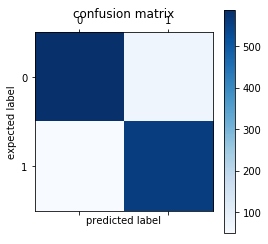

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
res = plt.matshow(confusion_matrix(y_test, all_predictions), cmap=plt.cm.Blues, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar(res)
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer( max_features=200000, stop_words='english', min_df=0.002, max_df=0.5, ngram_range=(1,3))
cv = count_vectorizer.fit(X_train)
%time train_count_matrix = cv.transform(X_train)

Wall time: 11 s


In [148]:
%time model2 = MultinomialNB().fit(train_count_matrix, y_train)

Wall time: 41 ms


In [149]:
test_count_matrix = cv.transform(X_test)
all_predictions2 = model2.predict(test_count_matrix)

In [150]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('accuracy {}'.format(accuracy_score(y_test, all_predictions2)))
print('confusion matrix\n {}'.format(confusion_matrix(y_test, all_predictions2)))
print('(row=expected, col=predicted)')

accuracy 0.899763220205
confusion matrix
 [[593  68]
 [ 59 547]]
(row=expected, col=predicted)


Text(0.5,0,u'predicted label')

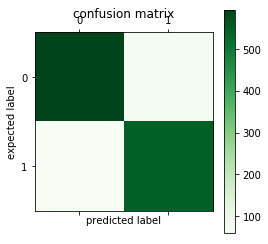

In [152]:
plt.matshow(confusion_matrix(y_test, all_predictions2), cmap=plt.cm.Greens, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')